<img src = "IMG_20170203_132623.jpg">

The dinucleotide PWM was trained on the raw FACS-seq data in a similar manner as the mononucleotide PWM, again excluding TIS sequences with an upstream AUG (Supplementary Table S1). 












Supplementary Table S1 Dinucleotide PWM of TIS efficiency Normalized values of the dinucleotide PWM

(exp(Cb,i) and exp(Cb1,i1,b2,i2)). The values were normalized such that the diagonal values were consistent with the

mononucleotide PWM. The off-diagonal values represent the cooperativity between TIS positions. Efficiency

values were calculated by multiplying the intercept (79.5) by all of the appropriate base/position values. Values

above 1.00 enhance TIS efficiency (red); values below 1.00 reduce TIS efficiency (blue).

<img src = "Screenshot_2017-02-03_18-45-04.png">

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading required package: stats4

Attaching package: ‘S4Vectors’

The following objects are maske

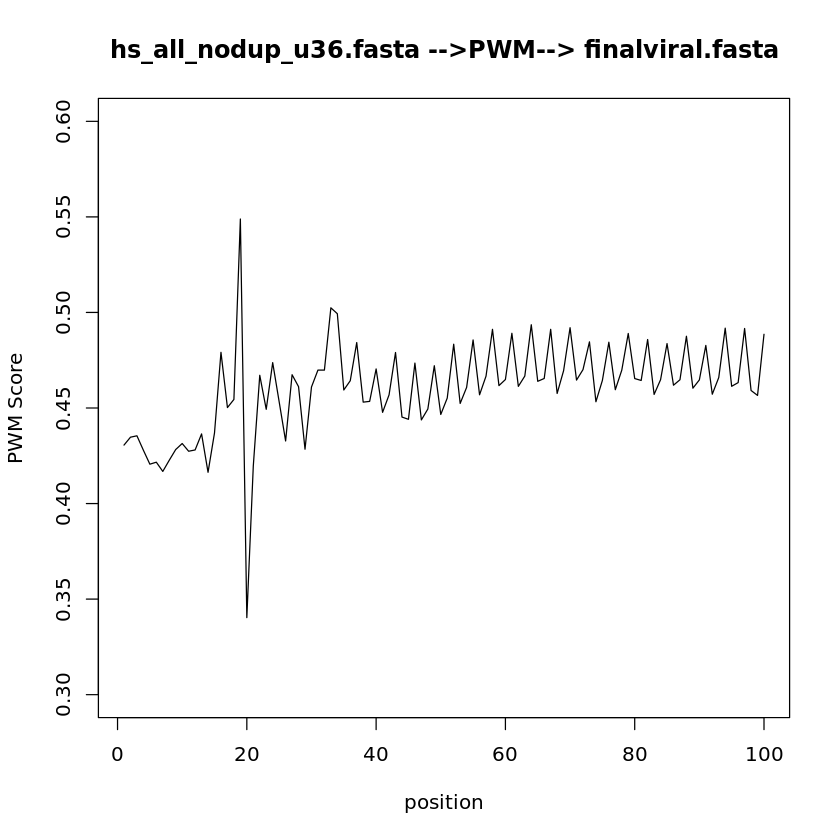

In [64]:
# Our next step is to score translation start sites by translation initiation mechanism.
#
# Attached is a sample code that does similar thing but not exactly.
#Here are the things you should do in your codes:
# 1. Collect all coding sequences with a bit of 5'UTRs, say 30 bps upstream from ATG.
# 2. Use viral genes that use scanning mechanism to build a PWM by R's Biostrings package
#   (google for documentation, there is only one site)
# 3. Score a sequence by scanning from 5' to 3', including 5'utr & coding region (ORF).
#  It should produce a score profile where y-axis is the score, x-axis is position.
#
# In theory, viral genes using scanning mechanism should
# show a peak at the annotated translation start site.
#  Whereas, viral genes using other mechanisms should not show a peak. Fingers crossed!

library(Biostrings)
#library(matrixStats)

# virus = readDNAStringSet('annotated_extracted_TIS_viral_30upstream_.CDS.TIS.fasta')
# virus.kozak = DNAStringSet(virus)
# virus.cons   = consensusString(virus.kozak)
# virus.pwm    = PWM(virus.kozak, type = 'log2probratio')

human.filename = "hs_all_nodup_u36.fasta"
query.filename = "finalviral.fasta"


#make a pwm of size 13
human = readDNAStringSet(human.filename)
human.kozak = DNAStringSet(subseq(human, start = 22, end= 34))
human.pwm    = PWM(human.kozak, type = 'log2probratio')

query = readDNAStringSet(query.filename)

#print(PWMscoreStartingAt(human.pwm, query[[1]], starting.at = 99))

#smallest.sequence <- min(query@ranges@width)-13

#loop through ever single element
pwm.scores = NULL

size.select = 120

for (i in 1:length(query)) {
  #atg.codon.subseq <- subseq(query[i], start = 31, end = 33)
  
  if(query@ranges@width[i] > size.select){
    #if (grepl("Scanning", query@ranges@NAMES[i]) == TRUE) {
    
  score <- PWMscoreStartingAt(human.pwm, query[[i]], starting.at = 1:100)
  
    #longest length the score can do is 168 b/c that is the shortest sequence
  pwm.scores = cbind(pwm.scores, score)
  }
  
}

pwm.score.means = rowMeans(pwm.scores)

# means <- rowMeans(pwm.scores)
# stds <- rowSds(pwm.scores)


plot(
  pwm.score.means,
  type = "l",
  xlab = "position",
  ylab = "PWM Score",
  ylim = c(0.3,0.6),
  main =  paste(human.filename, "-->PWM-->", query.filename)
)



# write.csv(pwm.score.means, paste(human.filename, "-->PWM-->", query.filename))

# data1 <- read.csv("rna30upstream_and_CDS.fasta -->PWM--> rna30upstream_and_CDS.fasta")
# data2 <- read.csv("rna30upstream_and_CDS.fasta -->PWM--> finalviral.fasta")

# df <- cbind(data1$x, data2$x)

# plot(data1$x, type = "l")
# lines(data2$x)

# plot(means, type = "l", ylim = c(0, 1))
# points(means + stds, type = "l")
# points(means - stds, type = "l")



#pick particular virus
#small group
#lower sample size
#12 sequences
#

#random sequences should expect steady state

#stddev near true ATG should be 0

#starndard devation per row




# ## Use human PWM to score viral seqs
# ## size of kozak sequence
# ## score only the beginning 336 bps (same as internal atg file)
# ksize = 13
# max.len = 336 - ksize + 1
# seqfiles = c('')
# outfiles = c('viral_orf_u36.tsv', 'viral_internal_atg.tsv')
# #seqfiles = c('viral_test.fasta','test_internal.fasta')
# #outfiles = c('viral_test.tsv','test_internal.tsv')
#
#
# for (idx in 1:length(seqfiles)) {
#   fname = seqfiles[idx]
#   print(fname)
#
#   virus = readDNAStringSet(fname)
#   all.scores = c()
#   all.scores.rownames = c()
#
#   for (i in 1:length(virus)) {
#     s.name = names(virus[i])
#     print(s.name)
#     s = virus[[i]]
#
#     if ((length(s) - ksize + 1) >= max.len) {
#       all.scores.rownames = c(all.scores.rownames, names(virus[i]))
#
#       s.scores = c()
#
#       for (st in 1:max.len) {
#         score = PWMscoreStartingAt(hs.pwm, s[st:(st + ksize - 1)])
#         s.scores = c(s.scores, score)
#       }
#
#       all.scores = rbind(all.scores, s.scores)
#     }
#   }
#   pos.names = c(seq(-27,-1, 1), seq(1, 297, 1))
#   colnames(all.scores) = pos.names
#   rownames(all.scores) = all.scores.rownames
#   write.table(all.scores,
#               file = outfiles[idx],
#               col.names = T,
#               sep = '\t')
# }
#
#
# ## Plot graphs
# real = read.table(outfiles[1], head = T, sep = '\t')
# internal = read.table(outfiles[2], head = T, sep = '\t')
# plot(
#   colMeans(real),
#   xlab = 'Position from ATG',
#   ylim = c(0, 1),
#   ylab = 'PWM scores',
#   type = 'l',
#   axes = F
# )
# pos.names = c(seq(-27,-1, 10), seq(1, 297, 10))
# axis(side = 1, at = pos.names)
# axis(side = 2, at = seq(0, 1, 0.1))
# #lines(colMeans(internal),col='blue')

In [1]:
# read in the TIS efficiencies TIS

        

TIS.eff <- read.csv(file = "mono_vectorized_TIS_seq.csv")



In [2]:
#remaking the model from the paper as SINGLE NUCLEOTIDE MODEL


#TIS.eff from supplement

library(Biostrings)

# U = TIS.eff$U
# C = TIS.eff$C
# A = TIS.eff$A
# G = TIS.eff$G

#because the model knows it already has U and C and A, it already knows what G will be



#summary(lm(log(TIS.eff$efficiency) ~ ., data = TIS.eff))

#does a model on all the TIS eff variables and the efficiency

model = lm(log(TIS.eff$efficiency) ~ ., data = TIS.eff)




model$coefficients[5]    = log(4-sum(exp(model$coefficients[2 :4])))
model$coefficients[9]    = log(4-sum(exp(model$coefficients[6 :8])))
model$coefficients[13]   = log(4-sum(exp(model$coefficients[10:12])))
model$coefficients[17]   = log(4-sum(exp(model$coefficients[14:16])))
model$coefficients[21]   = log(4-sum(exp(model$coefficients[18:20])))
model$coefficients[25]   = log(4-sum(exp(model$coefficients[22:24])))
model$coefficients[29]   = log(4-sum(exp(model$coefficients[26:28])))
model$coefficients[33]   = log(4-sum(exp(model$coefficients[30:32])))


#exp(model$coefficients[2:33])

model


pwm_dataframe = data.frame(exp(model$coefficients[2:5]),
exp(model$coefficients[6:9]),
exp(model$coefficients[10:13]),
exp(model$coefficients[14:17]),
exp(model$coefficients[18:21]),
exp(model$coefficients[22:25]),
exp(model$coefficients[26:29]),
exp(model$coefficients[30:33]))

pwm_dataframe

test = data.matrix(pwm_dataframe)



test[1]


PWMscoreStartingAt(test)
typeof(test)


#UCAG --> U.7, C.7, A.7, G.7


# lm(y~ ., data = TIS.eff[1])
#vector associated with efficienes  = 


#convert sequences to the 1/0 vector of size 8


#8 positions 4 ucleotides = 32 coefficients


#multiple regression






Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading required package: stats4

Attaching package: ‘S4Vectors’

The following objects are maske


Call:
lm(formula = log(TIS.eff$efficiency) ~ ., data = TIS.eff)

Coefficients:
(Intercept)            U            C            A            G          U.1  
   4.388165    -0.065892    -0.085285    -0.043654     0.172467     0.057338  
        C.1          A.1          G.1          U.2          C.2          A.2  
   0.050473    -0.043654    -0.070494    -0.032937     0.121419     0.095178  
        G.2          U.3          C.3          A.3          G.3          U.4  
  -0.218845    -0.493818    -0.221631     0.065332     0.419357     0.112668  
        C.4          A.4          G.4          U.5          C.5          A.5  
   0.201881     0.176546    -0.767984    -0.126889    -0.024267     0.054785  
        G.5          U.6          C.6          A.6          G.6          U.7  
   0.083265     0.018115    -0.135487    -0.051793     0.147475    -0.062730  
        C.7          A.7          G.7  
   0.081025     0.006035    -0.030097  


,exp.model.coefficients.2.5..,exp.model.coefficients.6.9..,exp.model.coefficients.10.13..,exp.model.coefficients.14.17..,exp.model.coefficients.18.21..,exp.model.coefficients.22.25..,exp.model.coefficients.26.29..,exp.model.coefficients.30.33..
U,0.9362317,1.0590132,0.9675999,0.6102920,1.1192606,0.8808314,1.0182805,0.9391968
C,0.9182507,1.0517687,1.1290984,0.8012111,1.2237028,0.9760255,0.8732903,1.0843981
A,0.9572854,0.9572847,1.0998551,1.0675139,1.1930891,1.0563135,0.9495250,1.0060535
G,1.1882321,0.9319334,0.8034466,1.5209830,0.4639476,1.0868295,1.1589042,0.9703516


[1] 0.9362317

ERROR: Error in .normargPwm(pwm): 'rownames(pwm)' must be the 4 DNA bases ('DNA_BASES')


In [7]:
#dinucleotide model

# read in the TIS efficiencies TIS

        

diNT.TIS.eff <- read.csv(file = "dint_vectorized_TIS_seq.csv")


#remaking the model from the paper as SINGLE NUCLEOTIDE MODEL


#TIS.eff from supplement

library(Biostrings)

# U = TIS.eff$U
# C = TIS.eff$C
# A = TIS.eff$A
# G = TIS.eff$G

#because the model knows it already has U and C and A, it already knows what G will be



#summary(lm(log(TIS.eff$efficiency) ~ ., data = TIS.eff))

#does a model on all the TIS eff variables and the efficiency

model = lm(log(diNT.TIS.eff$efficiency) ~ ., data = TIS.eff)

model

# pwm_dataframe

# test = data.matrix(pwm_dataframe)



# test[1]


# PWMscoreStartingAt(test)
# typeof(test)


# #UCAG --> U.7, C.7, A.7, G.7


# # lm(y~ ., data = TIS.eff[1])
# #vector associated with efficienes  = 


# #convert sequences to the 1/0 vector of size 8


# #8 positions 4 ucleotides = 32 coefficients


# #multiple regression







Call:
lm(formula = log(diNT.TIS.eff$efficiency) ~ ., data = TIS.eff)

Coefficients:
(Intercept)           UU           UC           UA           UG           CU  
  4.4799276    0.0384836    0.0783491   -0.0745446   -0.0673550    0.0332567  
         CC           CA           CG           AU           AC           AA  
  0.0291257   -0.0787239   -0.0862954    0.0711906    0.0855344   -0.0733276  
         AG           GU           GC           GA           GG         UU.1  
 -0.0195103    0.0805734    0.1238649    0.0340638           NA   -0.0399027  
       UC.1         UA.1         UG.1         CU.1         CC.1         CA.1  
  0.0359387    0.0519372           NA   -0.0874626   -0.0242151    0.0388239  
       CG.1         AU.1         AC.1         AA.1         AG.1         GU.1  
         NA   -0.0367768    0.0479122    0.0489065           NA    0.0157127  
       GC.1         GA.1         GG.1         UU.2         UC.2         UA.2  
  0.0784729    0.1211025           NA   -0.834

In [35]:
# model$coefficients

for (i in seq(17,97,4)) {
    model$coefficients[i] = 
}


# model$coefficients[5]    = log(16-sum(exp(model$coefficients[2 :4])))
# model$coefficients[9]    = log(4-sum(exp(model$coefficients[6 :8])))
# model$coefficients[13]   = log(4-sum(exp(model$coefficients[10:12])))
# model$coefficients[17]   = log(4-sum(exp(model$coefficients[14:16])))
# model$coefficients[21]   = log(4-sum(exp(model$coefficients[18:20])))
# model$coefficients[25]   = log(4-sum(exp(model$coefficients[22:24])))
# model$coefficients[29]   = log(4-sum(exp(model$coefficients[26:28])))
# model$coefficients[33]   = log(4-sum(exp(model$coefficients[30:32])))


# #exp(model$coefficients[2:33])

# model


# pwm_dataframe = data.frame(exp(model$coefficients[2:5]),
# exp(model$coefficients[6:9]),
# exp(model$coefficients[10:13]),
# exp(model$coefficients[14:17]),
# exp(model$coefficients[18:21]),
# exp(model$coefficients[22:25]),
# exp(model$coefficients[26:29]),
# exp(model$coefficients[30:33]))


(Intercept)            UU            UC            UA            UG 
 4.4799275745  0.0384835557  0.0783491431 -0.0745446012 -0.0673549529 
           CU            CC            CA            CG            AU 
 0.0332567209  0.0291256626 -0.0787239380 -0.0862954350  0.0711906433 
           AC            AA            AG            GU            GC 
 0.0855344313 -0.0733275945 -0.0195102624  0.0805734083  0.1238648867 
           GA            GG          UU.1          UC.1          UA.1 
 0.0340638281            NA -0.0399026654  0.0359387350  0.0519371760 
         UG.1          CU.1          CC.1          CA.1          CG.1 
           NA -0.0874626210 -0.0242150605  0.0388238504            NA 
         AU.1          AC.1          AA.1          AG.1          GU.1 
-0.0367767981  0.0479121775  0.0489065257            NA  0.0157126548 
         GC.1          GA.1          GG.1          UU.2          UC.2 
 0.0784729015  0.1211024520            NA -0.8348668938 -0.4016461145 
         UA.2          UG.2          CU.2          CC.2          CA.2 
 0.0941196805            NA -0.6122132529 -0.3039980723  0.1047036796 
         CG.2          AU.2          AC.2          AA.2          AG.2 
           NA -0.6926433157 -0.3446747722 -0.0018146979            NA 
         GU.2          GC.2          GA.2          GG.2          UU.3 
-0.8527992039 -0.4009801432  0.0947028102            NA  0.2124818573 
         UC.3          UA.3          UG.3          CU.3          CC.3 
 0.5011626026  0.4153939191            NA  0.1664301894  0.2285083146 
         CA.3          CG.3          AU.3          AC.3          AA.3 
 0.2816242386            NA  0.0170417329  0.0302304353  0.0341330707 
         AG.3          GU.3          GC.3          GA.3          GG.3 
           NA  0.0064468719  0.0461582729  0.0591816179            NA 
         UU.4          UC.4          UA.4          UG.4          CU.4 
-0.1424289359  0.0356126430  0.0506127509            NA -0.1039790979 
         CC.4          CA.4          CG.4          AU.4          AC.4 
-0.0561839535  0.0571527761            NA -0.1687895787 -0.0774093697 
         AA.4          AG.4          GU.4          GC.4          GA.4 
 0.0575736124            NA -0.0847816822 -0.1031808112  0.0834866094 
         GG.4          UU.5          UC.5          UA.5          UG.5 
           NA  0.0407612977 -0.1732799323 -0.0609315450            NA 
         CU.5          CC.5          CA.5          CG.5          AU.5 
 0.0388361739 -0.0914183142 -0.0291961694            NA -0.0070053462 
         AC.5          AA.5          AG.5          GU.5          GC.5 
-0.1338922344 -0.0746614798            NA -0.0001304454 -0.1433583707 
         GA.5          GG.5 
-0.0423846684            NA

[1] 97  1

GG 
NA 
UG.1 
  NA 
CG.1 
  NA 
AG.1 
  NA 
GG.1 
  NA 
UG.2 
  NA 
CG.2 
  NA 
AG.2 
  NA 
GG.2 
  NA 
UG.3 
  NA 
CG.3 
  NA 
AG.3 
  NA 
GG.3 
  NA 
UG.4 
  NA 
CG.4 
  NA 
AG.4 
  NA 
GG.4 
  NA 
UG.5 
  NA 
CG.5 
  NA 
AG.5 
  NA 
GG.5 
  NA 
